# Linear Regresion

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [6]:
df_simple = pd.read_csv('dataset/advertising.csv',usecols=['TV','Sales'])
df = pd.read_csv('dataset/advertising.csv')


In [7]:
df_simple.head()
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
df_simple.shape

(200, 2)

In [5]:
df_simple.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,15.130500
std,85.854236,5.283892
min,0.700000,1.600000
25%,74.375000,11.000000
50%,149.750000,16.000000
75%,218.825000,19.050000
max,296.400000,27.000000


In [8]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [9]:
lr = LinearRegression()

In [8]:
X = df_simple[["TV"]]
y = df_simple["Sales"]

In [16]:
X = df[["Radio"]]
y = df["Sales"]

### Train test split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [18]:
lr.fit(X_train,y_train)

LinearRegression()

In [19]:
y_pred = lr.predict(X_test)

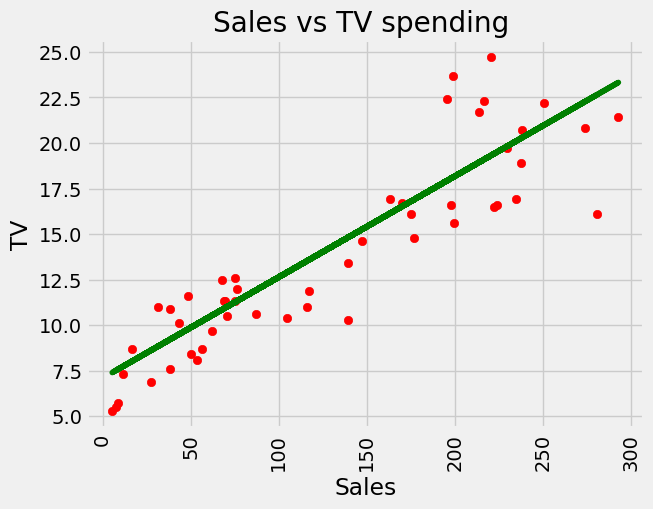

In [13]:
plt.scatter(X_test, y_test, color = "red")
plt.plot(X_test, lr.predict(X_test), color = "green")
plt.title("Sales vs TV spending ")
plt.xlabel("Sales")
plt.ylabel("TV")
plt.xticks(rotation=90)
plt.show()

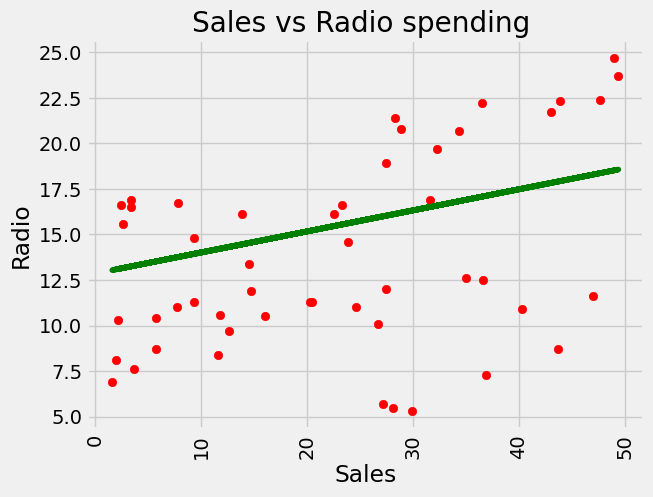

In [20]:
plt.scatter(X_test, y_test, color = "red")
plt.plot(X_test, lr.predict(X_test), color = "green")
plt.title("Sales vs Radio spending ")
plt.xlabel("Sales")
plt.ylabel("Radio")
plt.xticks(rotation=90)
plt.show()

In [14]:
print("R2 Score is :",round(r2_score(y_test,y_pred),3)*100,"%")

R2 Score is : 79.7 %


#### *Simple Linear Regression Formula* : **y = b0 + b1 * x1**
model regression linear sebenarnya merupakan rumus linear dalam bentuk y = b0 + b1*x1; dimana y merupakan keluaran atau outcome, dan x1 merupakan variable independen (predictor), juga b1 adalah kemiringan garis; juga dikenal sebagai koefisien regresi dan b0 adalah intersep yang diberi label konstan.

### Finding intercept and Coefficient

In [15]:
lr.intercept_

np.float64(7.098853680118275)

In [16]:
lr.coef_[0]

np.float64(0.05538653085519158)

- Let's find out sales number if we spend **300 $** on TV advertising

**by using our Simple Linear Regression**

In [17]:
print("Predicted Sales :",round(lr.predict([[300]])[0],2))

Predicted Sales : 23.71


d:\htdocs\data-analytics-python\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


**by using ıntercept and coefficient**

Recall the equation is y = b_0 + b_1 * x1

Let's put each value into the equationm

In [18]:
y = lr.intercept_ + lr.coef_* 300

In [19]:
print("Predicted Sales :",round(y[0],2))

Predicted Sales : 23.71


- We see the same value as you can see above . Linear regression does the same job for each observation.

## Multiple Linear Regression

In [20]:
df_multiple = pd.read_csv('dataset/advertising.csv')

In [21]:
df_multiple.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [22]:
df_multiple.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [23]:
X = df_multiple[["TV","Radio","Newspaper"]]
y = df_multiple["Sales"]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [25]:
lr = LinearRegression()

In [26]:
lr.fit(X_train,y_train)

LinearRegression()

### Interpretasi Hasil dengan Adjusted R Squared

- Kita sudah tahu bagaimana R Squared dapat membantu kita dalam Evaluasi Model. Namun, ada satu kelemahan utama menggunakan R Squared. Nilai R Squared tidak pernah berkurang. Jika Anda bertanya-tanya mengapa perlu dikurangi karena hanya akan menghasilkan model yang buruk, menambahkan variabel independen baru akan menghasilkan peningkatan nilai R Squared. Ini adalah aliran utama karena R Squared akan menyarankan bahwa menambahkan variabel baru terlepas dari apakah mereka benar-benar signifikan atau tidak, akan meningkatkan nilainya.

In [27]:
y_pred = lr.predict(X_test)

In [28]:
r_squared = r2_score(y_test,y_pred)

In [29]:
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)

In [30]:
print('Adjusted R Squared: %',round(adjusted_r_squared*100,2), 'R Squared: %',round(r_squared*100,2))

Adjusted R Squared: % 91.02 R Squared: % 91.16


#### *Rumus Multiple Linear Regression* : **y = b0 + b1 * x1  + b2 * x2  + b3 * x3**

In [31]:
print("Intercept is ",lr.intercept_,"and Coefficients are", lr.coef_)

Intercept is  4.741842244124568 and Coefficients are [0.05461383 0.09975946 0.00430495]


In [32]:
lr.coef_

array([0.05461383, 0.09975946, 0.00430495])

- Koefisien TV : **0.05444578**
- Koefisien Radio : **0.10700123**
- Koefisien Newspaper : **0.00033566**

#### Coba kita cari tahu berapa unit penjualan yang bsa kita peroleh dari pengeluaran dibawah ini 
- 200 Dollars untuk Periklanan TV
- 50  Dollars untuk Radio
- 20  Dollars untuk Newspaper

**Menggunakan Linear Regression kita**

In [33]:
round(lr.predict([[200,50,20]])[0],2)

d:\htdocs\data-analytics-python\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(20.74)

**Menggunakan coefficient dan intercept LR**

In [34]:
y = lr.intercept_ + lr.coef_[0] * 200 + lr.coef_[1] * 50 + lr.coef_[2] * 20

In [35]:
round(y,2)

np.float64(20.74)

#Linear Regression from scratch

In [39]:
# Importing libraries

import numpy as np

import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

# Linear Regression

class LinearRegression() :
	
	def __init__( self, learning_rate, iterations ) :
		
		self.learning_rate = learning_rate
		
		self.iterations = iterations
		
	# Function for model training
			
	def fit( self, X, Y ) :
		
		# no_of_training_examples, no_of_features
		
		self.m, self.n = X.shape
		
		# weight initialization
		
		self.W = np.zeros( self.n )
		
		self.b = 0
		
		self.X = X
		
		self.Y = Y
		
		
		# gradient descent learning
				
		for i in range( self.iterations ) :
			
			self.update_weights()
			
		return self
	
	# Helper function to update weights in gradient descent
	
	def update_weights( self ) :
			
		Y_pred = self.predict( self.X )
		
		# calculate gradients
	
		dW = - ( 2 * ( self.X.T ).dot( self.Y - Y_pred ) ) / self.m
	
		db = - 2 * np.sum( self.Y - Y_pred ) / self.m
		
		# update weights
	
		self.W = self.W - self.learning_rate * dW
	
		self.b = self.b - self.learning_rate * db
		
		return self
	
	# Hypothetical function h( x )
	
	def predict( self, X ) :
	
		return X.dot( self.W ) + self.b